**Setup Instructions**
1. Run all cells in sequence
2. Choose a topic (or add your own)
3. Wait ~2–3 mins for video, audio, gif

**Sample Input Topics**
1. Electric Charges and Fields Class 12
2. Current Electricity Class 12,
3. Electromagnetic Induction Class 12

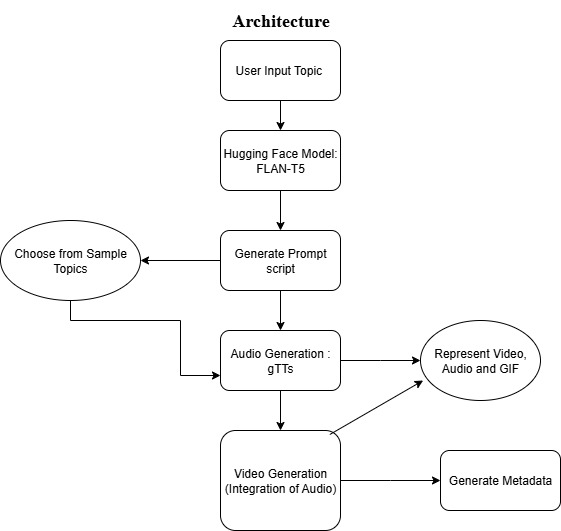

In [19]:
!pip install -q transformers gTTS moviepy requests

In [20]:
# Import Dependencies
from transformers import pipeline
from gtts import gTTS
from moviepy.editor import *
import requests, os
from IPython.display import Audio, HTML
from base64 import b64encode

In [21]:
physics_topics = [
    "Electric Charges and Fields Class 12",
    "Current Electricity Class 12",
    "Electromagnetic Induction Class 12"
]

print("Available Topics:\n")
for i, t in enumerate(physics_topics):
    print(f"{i+1}. {t}")

topic_index = int(input("\nEnter the number of the topic you want (1-3): ")) - 1
topic = physics_topics[topic_index]

Available Topics:

1. Electric Charges and Fields Class 12
2. Current Electricity Class 12
3. Electromagnetic Induction Class 12

Enter the number of the topic you want (1-3): 1


In [22]:
prompt = f"Write a detailed and engaging 800-word educational video script for a Class 12 Physics lesson on the topic: {topic}."
generator = pipeline("text2text-generation", model="google/flan-t5-large")
response = generator(prompt, max_length=1024, do_sample=True)[0]["generated_text"]
script = response

with open("script.txt", "w") as f:
    f.write(script)


Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [23]:
tts = gTTS(text=script, lang='en')
tts.save("voiceover.mp3")

In [24]:
# Load audio
audio = AudioFileClip("voiceover.mp3")

# Divide audio into 5 parts to match 5 slides
slide_count = 5
slide_duration = audio.duration / slide_count

colors = [(0, 0, 0), (0, 51, 102), (0, 102, 51), (51, 0, 102), (102, 51, 0)]

slides = []
for i in range(slide_count):
    clip = ColorClip(size=(1280, 720), color=colors[i % len(colors)], duration=slide_duration)
    clip = clip.set_audio(audio.subclip(i * slide_duration, (i + 1) * slide_duration))
    slides.append(clip)

video = concatenate_videoclips(slides)
video.write_videofile("final_video.mp4", fps=24)

Moviepy - Building video final_video.mp4.
MoviePy - Writing audio in final_videoTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video final_video.mp4



Moviepy - Done !
Moviepy - video ready final_video.mp4


In [25]:
# Display the audio
display(Audio("voiceover.mp3"))

# Display video
def play_video(path):
    mp4 = open(path, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML(f"""
      <video width=700 controls>
            <source src="{data_url}" type="video/mp4">
      </video>
    """)
play_video("final_video.mp4")


In [26]:
metadata_prompt = f"Generate a YouTube title, description, and 10 SEO-friendly tags for a Class 12 Physics video on: {topic}"
metadata_response = generator(metadata_prompt, max_length=256)[0]["generated_text"]
with open("metadata.json", "w") as f:
    f.write(metadata_response)
#print(metadata_response)

Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq -

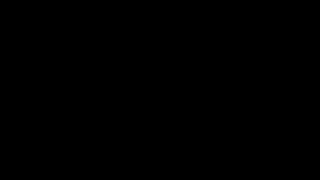

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
!apt -y install ffmpeg
!ffmpeg -i final_video.mp4 -vf "fps=10,scale=320:-1" Video.gif

#Display the GIF
from IPython.display import Image, display

display(Image(filename="Video.gif"))
#Download
from google.colab import files
files.download("Video.gif")